# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [3]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.add_node('Daniel')
G.nodes()

['Bob', 'Daniel', 'Alice', 'Chuck']

Here's how we add edges between nodes.

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.add_edge('Daniel','Alice')
G.add_edge('Chuck','Daniel')
G.edges()

[('Bob', 'Alice'),
 ('Bob', 'Chuck'),
 ('Daniel', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Chuck', 'Daniel')]

And here's how to draw the graph.

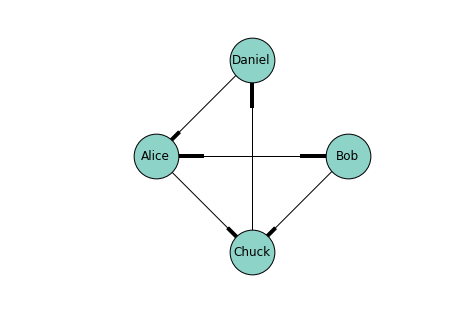

In [5]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

(-1.5, 1.5, -1.5, 1.5)

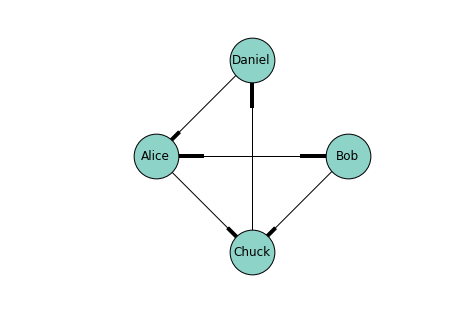

In [6]:
# Solution goes here
G.add_node('Daniel')
G.add_edge('Daniel','Alice')
G.add_edge('Chuck','Daniel')
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [7]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40),
          Tokyo=(-77,45))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [8]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Boston', 'Philly', 'Tokyo']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [9]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2,
              ('Boston','Tokyo'):20,
              ('Tokyo','NYC'):20}

We can use the keys from `drive_times` to add edges to the graph.

In [10]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Albany'),
 ('NYC', 'Boston'),
 ('NYC', 'Philly'),
 ('NYC', 'Tokyo'),
 ('Albany', 'Boston'),
 ('Boston', 'Tokyo')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

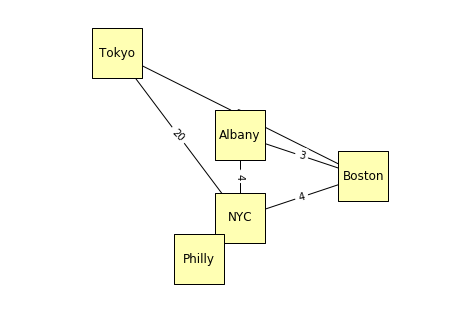

In [11]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

In [12]:
# Solution goes here

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [13]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [14]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [15]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

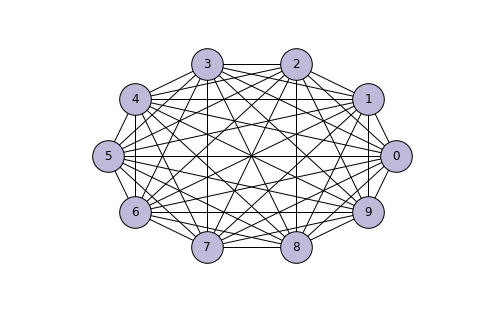

In [16]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [17]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

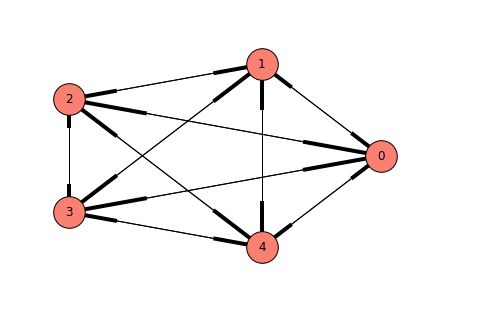

In [18]:
# Solution goes here
def all_pairs_2way(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            yield u, v
def make_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs_2way(nodes))
    return G
complete_digraph = make_complete_digraph(5)
nx.draw_circular(complete_digraph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [19]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [20]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [21]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [22]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

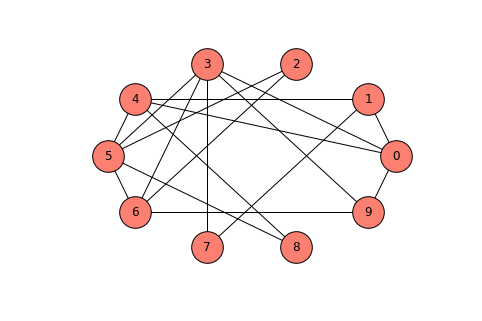

In [23]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [24]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [25]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [26]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [27]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [28]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [29]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [30]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [1]:
# Solution goes here
def make_incomplete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G
D = make_incomplete_digraph(5)
def dir_is_connected(G):
    """
    I think you can't go back along a 1-way edge?
    So we need all of them to be 2-way.
    Or just check the number of edges? If each node has to have a directed edge to every other node, the number of edges must be
    n*(n-1).
    """
    flag = True
    for node in G.nodes_iter(): #Checking every node is not super efficient(increases runtime by n times)?
        if flag == False:
            return flag
        else:
            reachable = reachable_nodes(G, node)
            flag = (len(reachable) == len(G.nodes)-1) #each node needs to reach every other node or it's not a complete digraph.

def dir_is_connected1(G):
    return len(G.edges) == len(G.nodes)*(len(G.nodes)-1)

dir_is_connected(D)

NameError: global name 'nx' is not defined

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [32]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p) #n is number of nodes, p is probability that a pair of nodes is connected
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [33]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [34]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [35]:
ps = np.logspace(-1.3, 0, 11) #probability space
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [36]:
ys = [prob_connected(n, p, 1000) for p in ps] #ys is an array containing the percent of graphs that are connected.
"""
For each connection probability, we draw 1000 ten-node graphs and see how many are connected
"""
for p, y in zip(ps, ys):
    print(p, y) #(probability of nodes being connected, percent of graphs that end up being connected)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

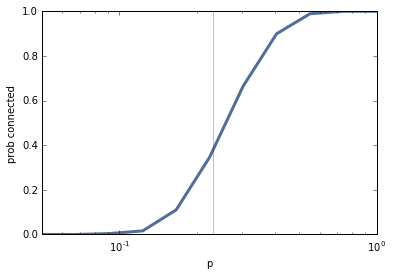

In [37]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

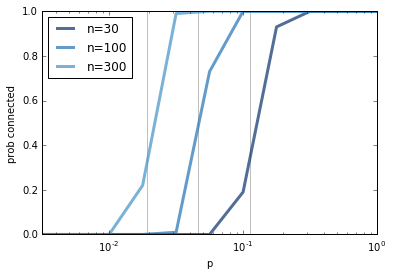

In [38]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [39]:
# Solution goes here
#We only run is_connected on the first node of G, so it seems like O(n+m) as well. 
#Comparing len(reachable) to len(G) is either in O(1) or O(n).
#Number of edges, m, is limited to 2*(n!) if we count directionality and n! if we don't

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [40]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [41]:
# Solution goes here
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            for neighbor in G.neighbors(node):
                if neighbor not in seen:
                    stack.append(node)
    return seen

In [45]:
%timeit len(reachable_nodes(complete, 0))

10000 loops, best of 3: 23.9 µs per loop


In [43]:
%timeit len(reachable_nodes_precheck(complete, 0))

"""
This is roughly 5 times faster than the version without precheck. 
In a more connected graph where each node is connected to a lot of other nodes, it's best to only put the neighbors that haven't been seen in the stack.
Otherwise you end up adding a whole bunch more neighbors to the stack every time, even if they've already been seen;
In the worst case scenario this might add complexity of O(n) to the calculation, I think.
"""

The slowest run took 4.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.25 µs per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [49]:
# Solution goes here
from random import sample
def m_pairs(nodeLst, edgeNumber):
    store = []
#     print("Length:", len(nodeLst))
    for i in range(len(nodeLst)):
        for j in range(i+1,len(nodeLst)):
            store.append((nodeLst[i],nodeLst[j]))
    return sample(store,edgeNumber)
#     return store

m_pairs([0,1],1)

def make_m_graph(n,m):
    G = nx.Graph()
    nodes = []
    for i in range(n):
#         print(i)
        nodes.append(i)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes,m))
    return G

mGraph = make_m_graph(3,2)
mGraph.nodes(), mGraph.edges()


([0, 1, 2], [(0, 2), (1, 2)])

In [50]:
# Solution goes here
def prob_connected_m(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m) #n is number of nodes, m is number of edges
        if is_connected(random_graph):
            count += 1
    return count/float(iters)

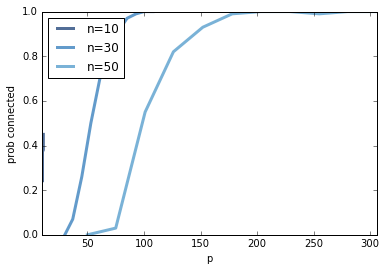

In [54]:
# Solution goes here
"""
Worst case: No edges, m = 0
Worst possible case for connectivity: m = n
Best case: Each node is connected to every other node, m = (n-1)+(n-2)+...+1 = (n(n-1))/2
For us to get any meaningful result, n < m < (n(n-1))/2
m has to be an integer, though.
Let's take 11 points: n + ([n(n-1)]/2 - n)*x/10 from x = 0 to x = 10
"""
numNodes = 10
prob_connected_m(numNodes,13, iters=100)

ns = [10, 30, 50]
ms = [[int(n + ((n*(n-1))/8 - n)*x/10) for x in range(11)] for n in ns]

thinkplot.preplot(len(ns))
for i in range(len(ns)):
    sublist = ms[i]
    ys = [prob_connected_m(ns[i], m) for m in sublist] 
    thinkplot.plot(sublist, ys, label='n=%d' % ns[i])

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xlim=[ms[0][0], ms[-1][-1]],
                 loc='upper left')
#jupyter lags out every time i run this, and on subsequent runs something earlier in the notebook makes the kernel busy 100% of the time.



In [ ]:
"""
Uh. I might have screwed up the E-R graph thingy. The shape of the n-m graphs looks sort of similar to the n-p graphs though.
"""

In [ ]:
"""
The modeling part of complexity science interests me the most. 
I hope that there'll be some sort of abstracting complex real life systems into a mathematical model which we can then use to investigate some behavior.
Computational methods sort of differ from experimental methods in the real world because you can't discover the existence of something new like a Higgs boson on a computer. All the rules have to be set in advance, and what we're looking for in computation is the emergence of some sort of pattern which we can make sense of.
In other aspects, computation seems to be a more controllable form of experimentation - you can set all the parameters to absurd precision, and monitor more stuff. But you can't discover a new rule, since you're creating a little universe with rules that you've decided on.
I think most people would say that complexity science has the potential to model real-world systems, but there's definitely disagreement as to how useful the results of the model are.
If you're not asking the right questions, the model is also likely to give you something useless, but that can be said for real-life experimentation too.
I'm honestly not sure what I want to get out of this course - the description looked interesting, it has computer science in it, and I feel like it's something I'd like to explore further. I hope that later on in the course I'll figure out the precise nature of the stuff I want to learn.
"""